# 03. Naver Movie Ranking

## 1. 네이버 영화 평점 사이트 분석
- "https://movie.naver.com/"
- 영화랭킹 탭 이동
- 영화랭킹에서 평점순(현재상영영화)
- https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210928

- 웹페이지 주소에는 많은 정보가 담겨 있습니다.
- 원하는 정보를 얻기 위해서 변화시켜줘야 하는 주소의 규칙을 찾을 수 있습니다.
- 여기에서는 날짜 정보를 변경해주면 해당 페이지에 접근이 가능합니다.


In [3]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs4

In [79]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914"
response = urlopen(url)
soup = bs4(response.read(), "html.parser")
soup.find("div").string()

TypeError: 'NoneType' object is not callable

In [17]:
for item in soup.find_all("div", class_="tit5")[:5]:
    href = item.find("a").get("href").strip()
    title = item.find("a").get("title").strip()
    print(href, title, sep=" | ")

/movie/bi/mi/basic.naver?code=174830 | 가버나움
/movie/bi/mi/basic.naver?code=201073 | 코다
/movie/bi/mi/basic.naver?code=10249 | 모던 타임즈
/movie/bi/mi/basic.naver?code=10341 | 위대한 독재자
/movie/bi/mi/basic.naver?code=19335 | 해피 투게더


In [25]:
urls = []
titles = []

for item in soup.select("div.tit5"):
    href = item.find("a").get("href").strip()
    title = item.find("a").get("title").strip()
    
    urls.append(href)
    titles.append(title)

In [29]:
rankes = []

for item in soup.find_all("td", class_="point"):
    rank = item.get_text()
    rankes.append(rank)

In [30]:
len(soup.find_all("div", class_="tit5")), len(soup.find_all("td", class_="point"))

(47, 47)

In [31]:
len(urls), len(titles), len(rankes)

(47, 47, 47)

In [33]:
data = {
    "Title" : titles,
    "Rank" : rankes,
    "Url" : urls
}
pd.DataFrame(data).head()

,Title,Rank,Url
0,가버나움,9.59,/movie/bi/mi/basic.naver?code=174830
1,코다,9.36,/movie/bi/mi/basic.naver?code=201073
2,모던 타임즈,9.32,/movie/bi/mi/basic.naver?code=10249
3,위대한 독재자,9.23,/movie/bi/mi/basic.naver?code=10341
4,해피 투게더,9.19,/movie/bi/mi/basic.naver?code=19335


---

## 2. 자동화를 위한 코드

```
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914
```
- 날짜만 변경하면 원하는 기간 만큼 데이터를 얻을 수 있습니다.

In [37]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs4

In [3]:
dates = pd.date_range("2021.01.01", periods=100, freq="D")
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [3]:
dates[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [6]:
dates[0].strftime("%Y-%m-%d")

'2021-01-01'

In [28]:
movie_dates = []
movie_names = []
movie_points = []

for today in tqdm(dates):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}".format(date = today.strftime("%Y%m%d"))
    response = urlopen(url)
    soup = bs4(response, "html.parser")
    
    movie_date = [ today for _ in range(len(soup.find_all("div", class_="tit5"))) ]
    movie_name = [ item.find("a").get("title") for item in soup.find_all("div", class_="tit5") ]
    movie_point = [ td.text.strip() for td in soup.find_all("td", class_="point") ]
    movie_dates.extend(movie_date)
    movie_names.extend(movie_name)
    movie_points.extend(movie_point)
    
    time.sleep(1)
    

100%|██████████████████████████████████████████████| 100/100 [01:58<00:00,  1.19s/it]


In [31]:
len(movie_dates), len(movie_names), len(movie_points)

(4793, 4793, 4793)

In [32]:
data = {
    "date":movie_dates,
    "name":movie_names,
    "point":movie_points
}
df = pd.DataFrame(data)
df.head()

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39


In [33]:
df.to_csv(
    "../data/03. naver_moive_data.csv", sep=",", encoding="utf-8"
)

## 3. 영화 평점 데이터 정리

In [47]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

In [48]:
movie = pd.read_csv("../data/03. naver_moive_data.csv", index_col=0)
movie.head()

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39


-  영화 이름으로 인덱스를 잡습니다.
- 점수의 합산을 구합니다.
- 100일 간 네이버 영화 평점 합산 기준 베스트 & 워스크 10 선정

In [49]:
movie_unique = movie.pivot_table(index="name", aggfunc=np.sum)
movie_unique.head()

,point
name,
120BPM,2.76
1917,62.09
800,25.27
가나의 혼인잔치: 언약,501.68
건축학개론,78.03


In [50]:
movie_best = movie_unique.sort_values(by="point", ascending=False)
movie_best.head()

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12


In [58]:
tmp = movie.query("name == ['화양연화']")
tmp

,date,name,point
22,2021-01-01,화양연화,8.80
70,2021-01-02,화양연화,8.79
117,2021-01-03,화양연화,8.75
162,2021-01-04,화양연화,8.76
205,2021-01-05,화양연화,8.76
...,...,...,...
4571,2021-04-06,화양연화,8.79
4621,2021-04-07,화양연화,8.79
4668,2021-04-08,화양연화,8.79
4719,2021-04-09,화양연화,8.79


In [59]:
# 시각화
 
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

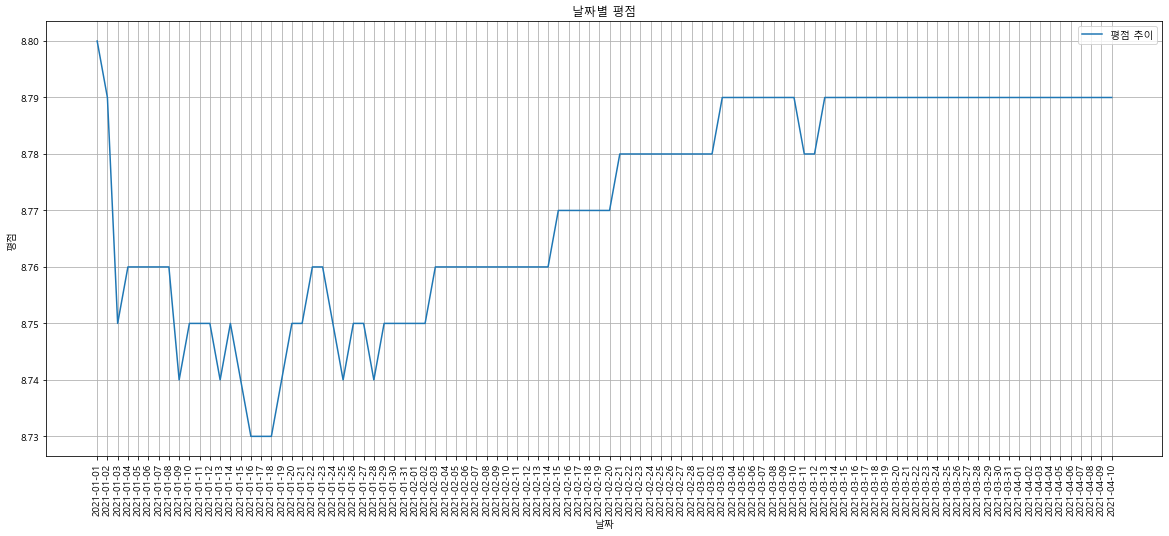

In [65]:
plt.figure(figsize=(20, 8))
plt.plot(tmp["date"], tmp["point"]) # 선 그래프 -> x축 날짜, y축 평점 -> 날짜에 따른 평점 변화를 선그래프로 표현(시계열)
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.legend(labels=["평점 추이"], loc="best")
plt.grid(True)
plt.show()

In [66]:
# 평점 상위 10
movie_best.head(10)

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
타오르는 여인의 초상,833.51
너의 이름은.,817.40
아비정전,814.83
찬실이는 복도 많지,785.58


In [67]:
# 평점 하위 10
movie_best.tail(10)

,point
name,
최악의 하루,23.40
열혈남아,23.16
영웅본색,18.36
너는 여기에 없었다,15.64
협상,14.64
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54
신 고질라,4.97


In [68]:
movie_pivot = movie.pivot_table(index="date", columns="name", values="point")
movie_pivot

name,120BPM,1917,800,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,NaN,NaN,9.04,8.7,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,NaN,NaN,9.04,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,NaN,NaN,NaN,9.42,8.67,NaN,8.37,NaN,NaN,NaN,...,NaN,NaN,8.11,NaN,NaN,9.2,NaN,NaN,NaN,8.79
2021-04-07,NaN,NaN,NaN,9.42,8.67,NaN,8.36,NaN,NaN,NaN,...,NaN,NaN,8.11,NaN,NaN,9.2,NaN,NaN,NaN,8.79
2021-04-08,NaN,NaN,NaN,9.42,8.67,NaN,8.33,NaN,NaN,NaN,...,NaN,NaN,8.11,NaN,NaN,9.2,NaN,NaN,NaN,8.79


In [70]:
movie_pivot.to_excel("../data/03. movie_pivot.xlsx")

In [71]:
import platform
import seaborn as sns
from matplotlib import font_manager, rc

f_path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=f_path).get_name()
    rc('font', family=font_name)
    rc('axes', unicode_minus=False)
else:
    print("Unknown system. sorry")

get_ipython().run_line_magic("matplotlib", "inline")

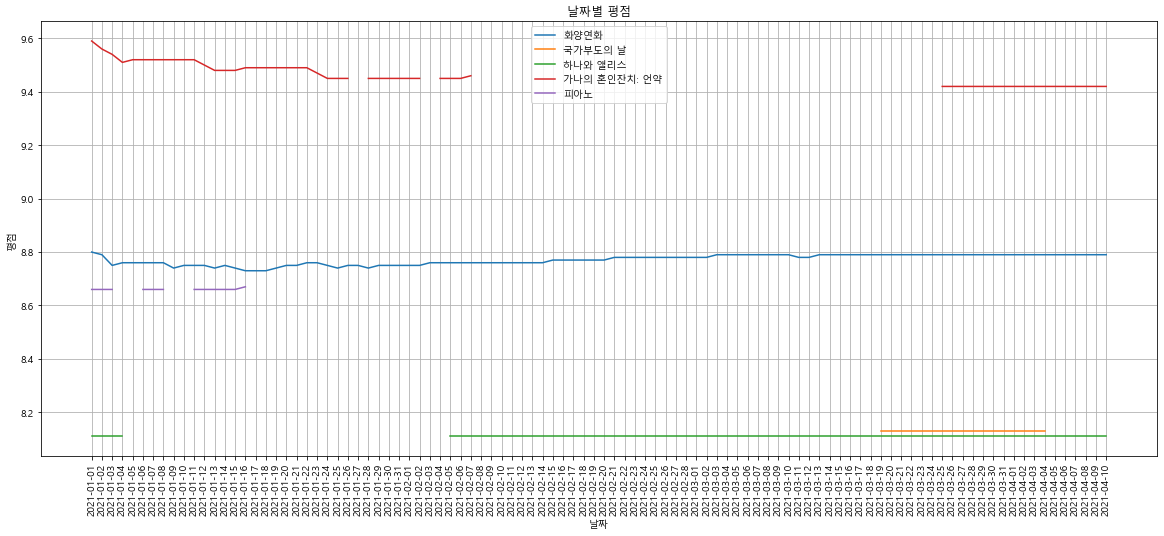

In [74]:
target_col = ["화양연화", "국가부도의 날", "하나와 앨리스", "가나의 혼인잔치: 언약", "피아노"]
plt.figure(figsize=(20, 8))
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.tick_params(bottom="off", labelbottom="off")
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best")
plt.grid(True)
plt.show()

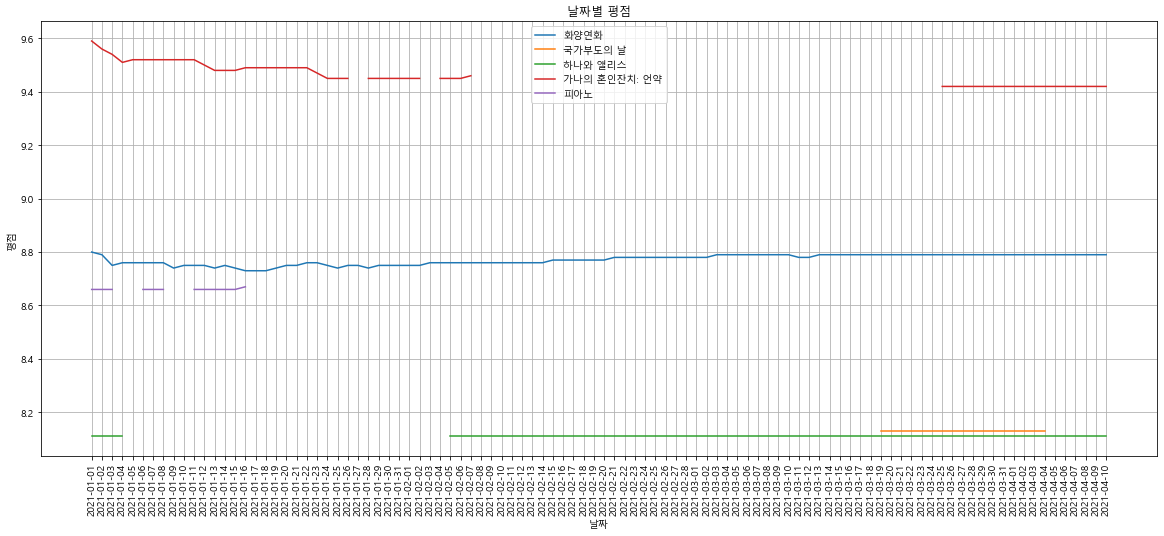

In [75]:
target_col = ["화양연화", "국가부도의 날", "하나와 앨리스", "가나의 혼인잔치: 언약", "피아노"]
plt.figure(figsize=(20, 8))
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best")
plt.grid(True)
plt.show()